Load in packages

In [1]:
%matplotlib inline

from parasol.filestructure import FileStructure
from parasol.analysis.grapher import Grapher
from parasol.analysis.analysis import Analysis

import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Initialize packages

In [2]:
filestructure = FileStructure()
grapher = Grapher()
analysis = Analysis()

Set root directory, pull data

In [3]:
# Method 1
# Set Root Directory (folder that holds test folders), get list of folders
# root_dir = 'C:\\Users\\seand\\Documents\\Data\\OutDoorTest'
# root_dir = 'C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization'
#test_folders = filestructure.get_tests(rootdir=root_dir)


# Method 2
# Hardcode which files to look at, get list of folders
# test_folders = ['C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20220430\\x20220430_et1a',
# 'C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20220430\\x20220430_et1b',
# 'C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20220430\\x20220430_et3a',
# # 'C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20220422\\x20220422_ShortManyScans_3',
# # 'C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20220422\\x20220422_ShortManyScans_4',
# ]

# Method 2b (same but just 1 data set)
# test_folders = ['C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20230627\\x20230627_Two_Cells']
test_folders = ['C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20230627\\x20230627_MHP_Cell']

# test_folders = ['C:\\Users\\FRG-LAPTOP\\Documents\\PARASOL\\Characterization\\x20230626\\x20230626_MHP']


# Generate list of files in each folder seperated by test
analyzed_files = filestructure.get_files(test_folders, "Analyzed")
mpp_files = filestructure.get_files(test_folders, "MPP")
jv_files = filestructure.get_files(test_folders, "JV")

Load Data

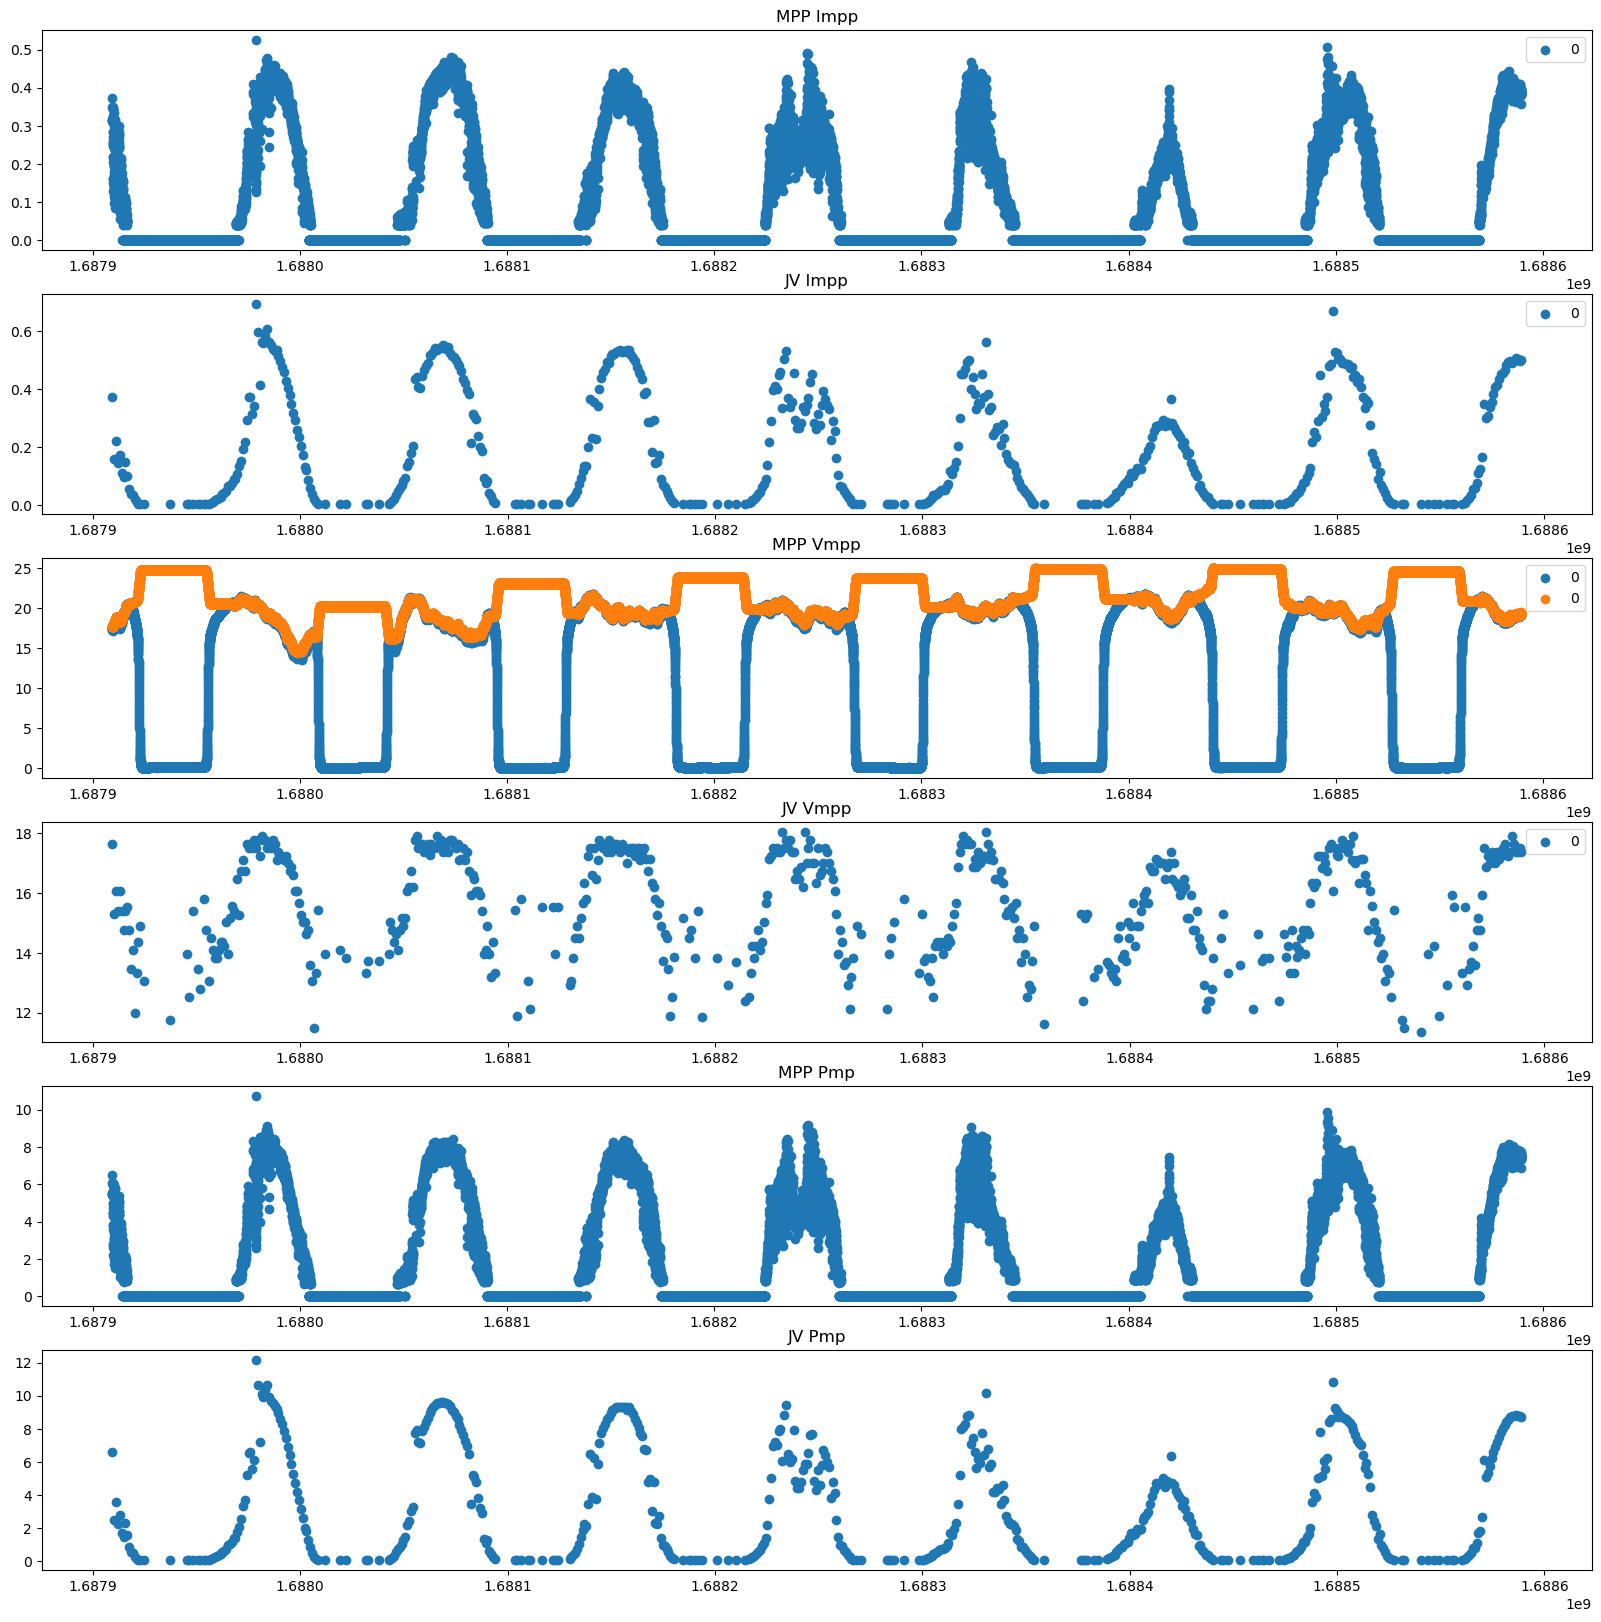

In [13]:
# Generaic load all data and plot
plt.rcParams["figure.figsize"] = (20,20)
figure, axes = plt.subplots(6)

# cycle through each device on test
for test in range(len(jv_files)):

    mpp_t, mpp_vapp, mpp_v, mpp_i, mpp_j, mpp_p = analysis.load_mpp_files(mpp_file_paths=mpp_files[0])
    jv_t, jv_vapp, jv_v_fwd, jv_i_fwd, jv_j_fwd, jv_p_fwd, jv_v_rev, jv_i_rev, jv_j_rev, jv_p_rev = analysis.load_jv_files(jv_file_paths=jv_files[test])
    scalar_df = pd.read_csv((analyzed_files[0])[test])

    axes[0].scatter(mpp_t,mpp_j, label = f'{test}')
    axes[1].scatter(scalar_df['Time (Epoch)'],(scalar_df['REV Jmp (mA/cm2)']+scalar_df['FWD Jmp (mA/cm2)'])/2, label = f'{test}')
    axes[2].scatter(mpp_t,mpp_v, label = f'{test}')
    axes[2].scatter(mpp_t,mpp_vapp, label = f'{test}')
    axes[3].scatter(scalar_df['Time (Epoch)'],(scalar_df['REV Vmp (V)']+scalar_df['FWD Vmp (V)'])/2, label = f'{test}')
    
    axes[4].scatter(mpp_t,mpp_p, label = f'{test}')
    axes[5].scatter(scalar_df['Time (Epoch)'],(scalar_df['REV Pmp (mW/cm2)']+scalar_df['FWD Pmp (mW/cm2)'])/2, label = f'{test}')

    #axes[0].set_xlim([39200+1.6508000000E9, 39600+1.6508000000E9])
    #axes[1].set_xlim([39200+1.6508000000E9, 39600+1.6508000000E9])
    #axes[2].set_xlim([39200+1.6508000000E9, 39600+1.6508000000E9])
    #axes[3].set_xlim([39200+1.6508000000E9, 39600+1.6508000000E9])

    # axes[2].set_ylim([0,0.6])
    # axes[3].set_ylim([0,0.6])

    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    axes[3].legend()

    axes[0].set_title('MPP Impp')
    axes[1].set_title('JV Impp')
    axes[2].set_title('MPP Vmpp')
    axes[3].set_title('JV Vmpp')
    axes[4].set_title('MPP Pmp')
    axes[5].set_title('JV Pmp')

figure

Plot JVs

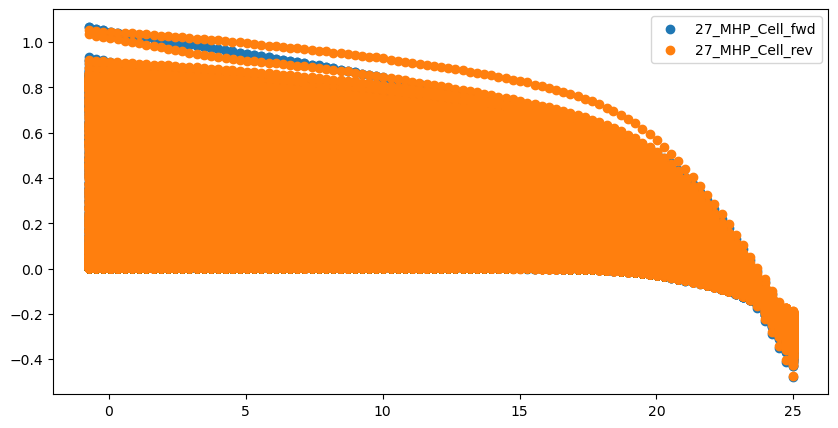

In [14]:
# Generaic load all data and plot
plt.rcParams["figure.figsize"] = (10,5)
figure, axes = plt.subplots(1)

for test in range(len(jv_files)):

    jv_t, jv_vapp, jv_v_fwd, jv_i_fwd, jv_j_fwd, jv_p_fwd, jv_v_rev, jv_i_rev, jv_j_rev, jv_p_rev = analysis.load_jv_files(jv_file_paths=jv_files[test])

    axes.scatter(jv_v_fwd, jv_j_fwd, label = f'{test_folders[test][-11:]}_fwd')
    axes.scatter(jv_v_rev, jv_j_rev, label = f'{test_folders[test][-11:]}_rev')

axes.legend()

figure

Set Variables for Plots

In [6]:
# Print Parameters Availible to plot
#print(grapher.variable_dict.keys())

files_to_plot = analyzed_files
y_axis = "FWD Jsc"
y2_axis = "REV Jsc"
x_axis = "Time Elapsed"
z_axis = "FWD Voc"

Create 1 Figure showing data from series (xy_scalars example)

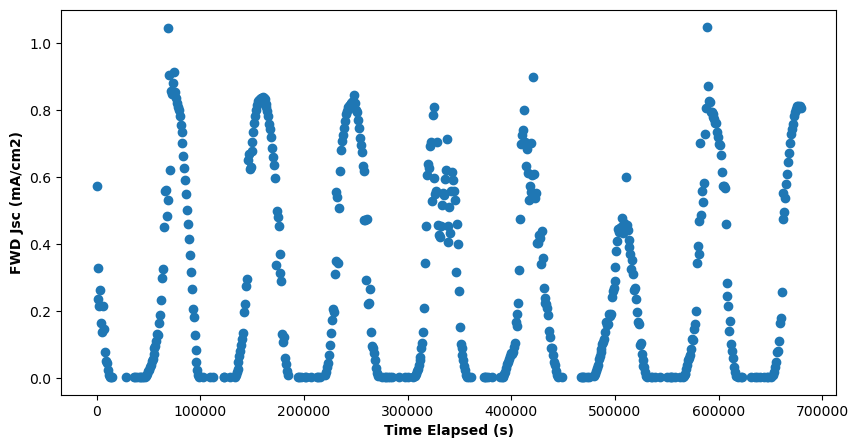

In [15]:
# Create Figure
figure, axes = plt.subplots(1)

# Cycle through each testfile
for sublist in files_to_plot:
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xy_scalars(
            paramfiles = [file],
            x = grapher.variable_dict[x_axis], 
            y = grapher.variable_dict[y_axis],
            ax = axes, 
            )
    
# Show plot
figure

Create 1 Figure showing data from series (xy2_scalars example)

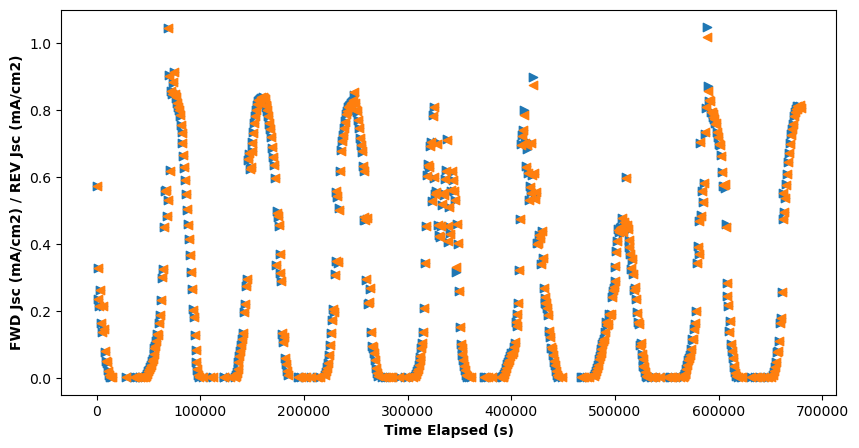

In [16]:
# Create Figure
figure, axes = plt.subplots(1)

# Cycle through each testfile
for sublist in files_to_plot:
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xy2_scalars(
            paramfiles = [file],
            x = grapher.variable_dict[x_axis], 
            ys = [grapher.variable_dict[y_axis], grapher.variable_dict[y2_axis]],
            ax = axes, 
            )

figure


Create multiple figures shwing data from series (plot_xyz_scalar example)

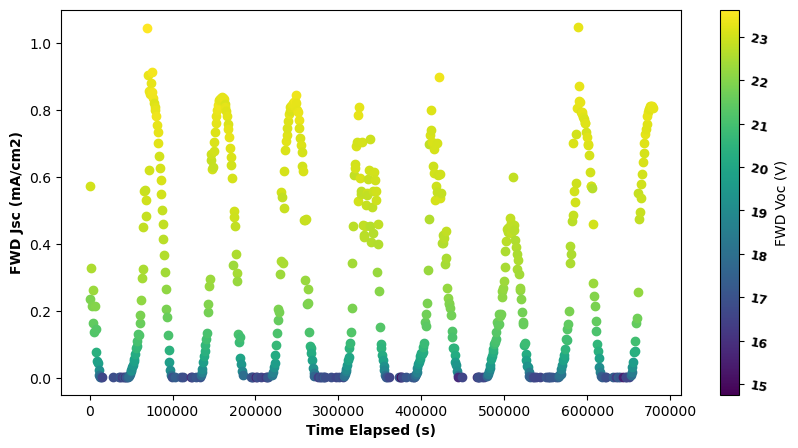

In [18]:
# Cycle through each testfile
for sublist in files_to_plot:
    
    figure, axes = plt.subplots(1)
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xyz_scalar(
            paramfile = file,
            x = grapher.variable_dict[x_axis], 
            y = grapher.variable_dict[y_axis],
            z = grapher.variable_dict[z_axis], 
            ax = axes,
            )
    
figure